### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [1]:
########################################################################
######################### Write your code here #########################
########################################################################
import spacy
import glob
nlp=spacy.load('en',disable=['ner','parser','tagger'],max_length=10000000)

In [2]:

file_list=glob.glob('./HW1_Dataset/*.txt')
text=[]
for file in file_list:
    text.append(open(file).read()) 




(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [3]:
########################################################################
######################### Write your code here #########################
########################################################################
import re  # regular expression package
from operator import itemgetter
## i nlp one article per time ,this is the second solution provided by our instructor
word_count = {}
for article in text:
    parsed_text=nlp(article)
    for token in parsed_text:
        if re.match('[a-zA-Z]+$',token.lemma_.lower()):
            if token.lemma_.lower() not in word_count:
                word_count[token.lemma_.lower()]=1
            else:
                word_count[token.lemma_.lower()]+=1
        

sorted_word_count= sorted(word_count.items(),
                                  reverse=True,
                                  key=itemgetter(1))
rank_label=[rank+1 for rank in range(len(sorted_word_count))]
frequency=[key for (word, key) in sorted_word_count]


top_fifty=sorted_word_count[0:50]
top_fifty_word=[word for (word, key) in top_fifty]
top_fifty_frequency=[value for(word, value) in top_fifty]



for rank in range(50):
    print(rank+1,top_fifty_word[rank],top_fifty_frequency[rank])


1 the 703039
2 and 436050
3 be 428776
4 of 386402
5 a 348722
6 to 324526
7 in 204342
8 i 188689
9 have 188175
10 that 170133
11 he 132594
12 it 132206
13 not 112562
14 you 108862
15 his 108574
16 with 101244
17 for 95436
18 this 76752
19 but 75889
20 my 74158
21 her 68453
22 at 65031
23 on 62908
24 do 62624
25 by 61992
26 him 59131
27 which 58932
28 all 58815
29 say 58546
30 me 58131
31 they 56663
32 she 52136
33 from 50107
34 much 49509
35 so 48117
36 or 47840
37 will 44667
38 can 42370
39 we 41808
40 one 41273
41 man 39882
42 them 39409
43 no 38577
44 their 38383
45 what 37922
46 there 37287
47 if 34981
48 go 33838
49 when 33646
50 would 32861


(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

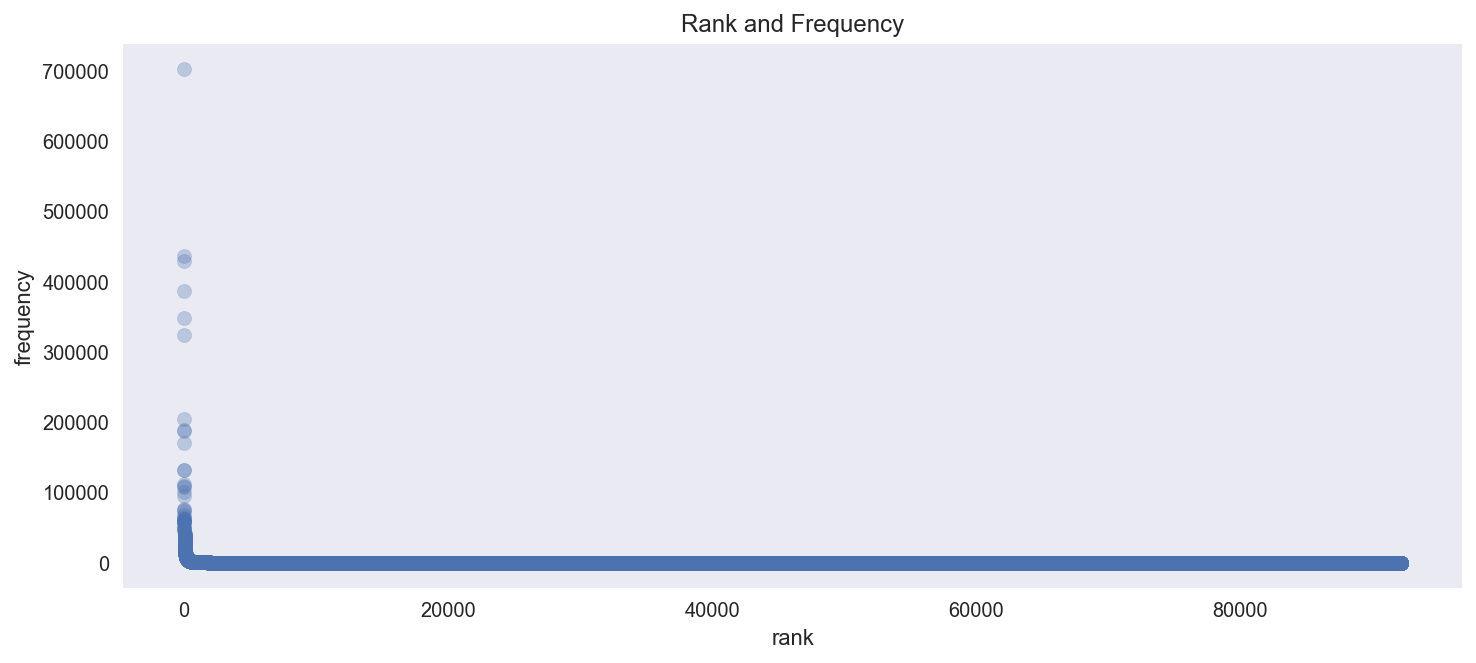

In [4]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize = (12,5))
plt.scatter(rank_label,frequency,alpha=0.3)
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Rank and Frequency')
plt.grid()
plt.show()


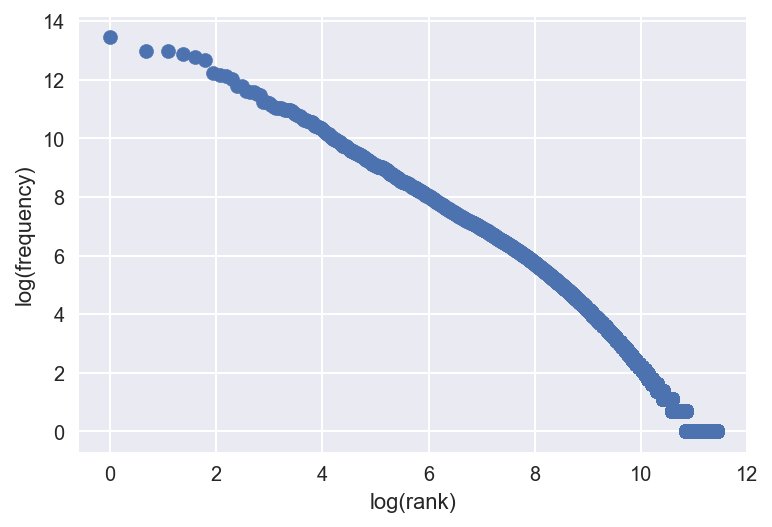

In [5]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################
from math import log
x=[log(rank+1) for rank,(key, _) in enumerate(sorted_word_count)]
y=[log(value) for word, value in sorted_word_count]
plt.scatter(x,y)
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()






(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***
yes the slope of this line in the figure is near -1 and since f(r) =c*r^(-1) when we get the log value for both sides log(f(r))=log(c)-log(r) y=log(f(r)) and x=log(r) the fomula should be like y=constant-x ,which is consist with the figure we get

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [6]:
print('Probability of drawing one of the 4 most frequent words: ')
########################################################################
######################### Write your code here #########################
########################################################################
count_list=[values for (key ,values) in sorted_word_count ]
total_count=sum(count_list)
p_1=0
for i in range(4):
    p_1+=count_list[i]/total_count
print(p_1)




print('Probability of drawing one of the 50 most frequent words: ')
########################################################################
######################### Write your code here #########################
########################################################################
p_2=0
for i in range(50):
    p_2+=count_list[i]/total_count
print(p_2)



Probability of drawing one of the 4 most frequent words: 
0.16174909818989086
Probability of drawing one of the 50 most frequent words: 
0.48443361077707686


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [7]:
print("Occur only once: ")
########################################################################
######################### Write your code here #########################
########################################################################

only_once_list=[values for (key ,values) in sorted_word_count if values==1 ]
print(sum(only_once_list)/len(sorted_word_count))
print("Occur fewer than 10 times: ")
########################################################################
######################### Write your code here #########################
########################################################################
fewer__10_list=[values for (key ,values) in sorted_word_count if values<10 ]
print(len(fewer__10_list)/len(sorted_word_count))





Occur only once: 
0.44313955127579513
Occur fewer than 10 times: 
0.7710725788086795


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [15 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

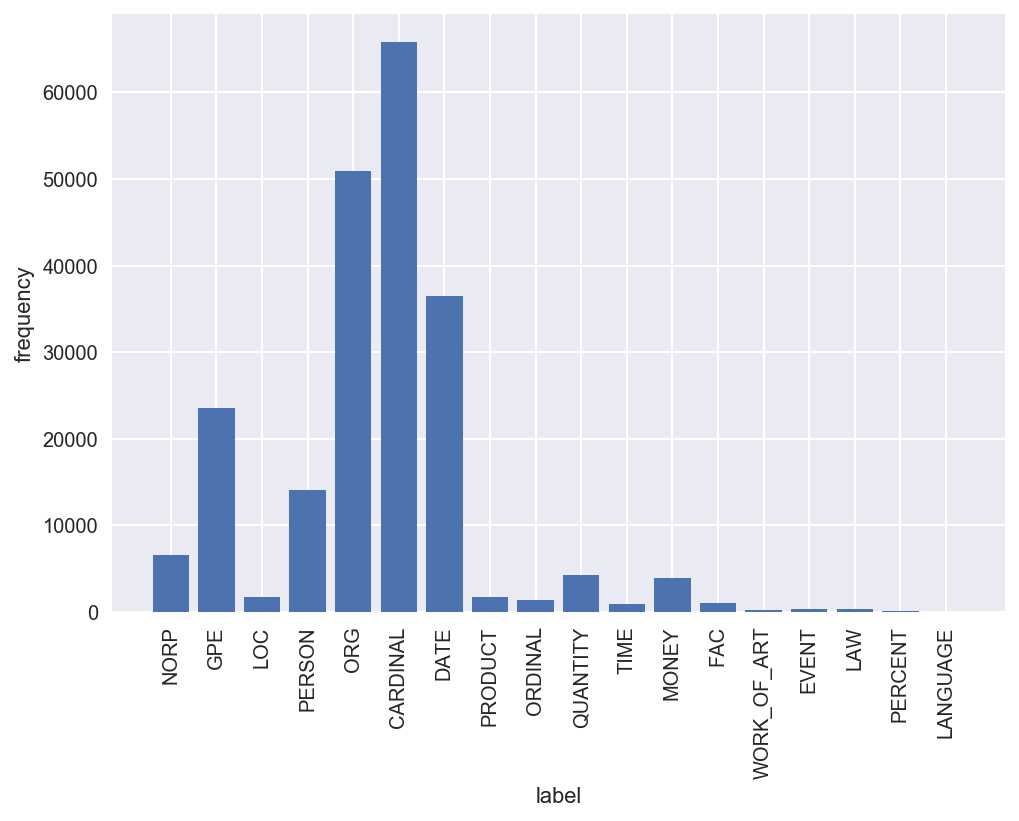

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()
########################################################################
######################### Write your code here #########################
########################################################################
entity_list=[]

for article in reuters_nlp:
    entity_list_article=[entity.label_ for entity in article.ents]
    entity_list.extend(entity_list_article)

for entity in entity_list:
    label_counter[entity] += 1
     
plt.style.use('seaborn')  
%config InlineBackend.figure_format = 'retina'  
x_list=list(label_counter.keys())
y_list=list(label_counter.values())
plt.bar(x_list,y_list)
plt.xticks(rotation=90)
plt.xlabel('label')
plt.ylabel('frequency')
plt.show()








(b) [15 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [9]:
########################################################################
######################### Write your code here #########################
########################################################################
from operator import itemgetter
entity_counter=Counter()
for article in reuters_nlp:
    Org_list=[]
    for entity in article.ents:
        
        if (entity.label_=='ORG'):
            
            Org_list.append(entity.text.lower())
    Org_set=set(Org_list)
    for org in list(Org_set):
        entity_counter[org]+=1
sorted_word_count= sorted(entity_counter.items(),
                                  reverse=True,
                                  key=itemgetter(1))

print(sorted_word_count[:10])



[('avg', 583), ('reuters', 445), ('the securities and exchange commission', 246), ('ec', 240), ('usda', 226), ('fed', 220), ('net', 203), ('treasury', 183), ('the u.s. agriculture department', 170), ('congress', 139)]


In [10]:
entity_counter_2=Counter()
for article in reuters_nlp:
    Org_set=set([entity.text.lower() for entity in article.ents if entity.label_=='GPE'])
    for org in list(Org_set):
        entity_counter_2[org]+=1
sorted_word_count_2= sorted(entity_counter_2.items(),
                                  reverse=True,
                                  key=itemgetter(1))

print(sorted_word_count_2[:10])        


[('u.s.', 1666), ('shr', 690), ('japan', 588), ('the united states', 375), ('u.k.', 309), ('canada', 291), ('new york', 243), ('west germany', 234), ('washington', 231), ('london', 212)]


(c) [20 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  

Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [11]:
########################################################################
######################### Write your code here #########################
########################################################################
## Our purpose: rank PMI which is log(p(ab)/p(a)*p(b)) Solution:since p('opec') is the same we can only
##compare p(ab)/p(b) p(ab) is the number of documents when both words exist /number of documents
##p(b) is the number of documents containing one specific GPE/number of documents therefore we can 
##only use the number of documents with both words/number of documents for one GPE (entity_counter_2)
a='opec'
coexist_counter=Counter()
for article in reuters_nlp:
    all_list=[token.lemma_.lower() for token in article]
    if a in all_list:
        Org_set=set([entity.text.lower() for entity in article.ents if entity.label_=='GPE'])
        for org in list(Org_set):
            coexist_counter[org]+=1
PMIlist={}
for entity, value in entity_counter_2.items():
    if entity in coexist_counter:
        PMIlist[entity]= coexist_counter[entity]/entity_counter_2[entity]
    else:
        PMIlist[entity]=0

sorted_PMI= sorted(PMIlist.items(),
                    reverse=True,
                    key=itemgetter(1))
top_50=[entity for entity ,value in sorted_PMI[0:50]]

print(top_50)

['lichtblau', 'duri', 'minas', 'sulphur', 'i.e.', 'assessing', 'l.f.', 'emirates', 'the lake charles', 'bethesda', "gabon on africa's", 'easter', 'pgrt', 'cera', 'neutral zone', 'saudi arabia 500,000', 'yanbu', 'reventador', 'el salado', 'aguarico', 'ecaudor', "ju'aymah", 'nazir', 'tripoli', 'doha', 'balao', 'visnews', 'discussion', 'vienna', 'riyadh', 'quota', "saudi arabia's", 'petronas', 'quito', 'dubai', 'qatar', 'caracas', 'libya', 'uae', 'brent', 'petromin', 'statfjord', 'conable', 'port jerome', 'ecuador', 'nigeria', 'saudi arabia', 'kuwait', 'venezuela', 'the united arab emirates']


Your text answer (for this question, your answer is *not* code): *** WRITE YOUR ANSWER HERE ***
Some of the results are not supersing such as the united arab emirates.it is a member of OPEC. Therefore, they may coexist for many times. while some results are supersing. PMI can not always show interesting dependencies. For example, some words are seldom used. Suppose it is only used one time in the corpus and 'opec' also happenly exist in this article. Even if the relationship between 'opec' and such word is meaningless, it has a high PMI. Interesting relation may have higher PMI by higher p(ab) while some meaningless relation may  have higher PMI by lower p(b)

